<center> <img alt="DAGsHub" width=500px src=https://raw.githubusercontent.com/DAGsHub/client/master/dagshub_github.png> </center>

# Stack Exchange Tutorial - Exploratory Data Analysis (EDA)
This notebook is the analysis of the data used in [DAGsHub's tutorial](https://dagshub.com/docs/experiment-tutorial/overview/).

It's here mostly to give more in-depth explanations and code for those who are interested, and allows you to easily modify the code and try different things.

If you just want to learn how to use DAGsHub, we suggest you just read through the [tutorial](https://dagshub.com/docs/experiment-tutorial/overview/), where we [explain the important parts of the results of this EDA](https://dagshub.com/docs/tutorial/0-data), as well as:

* [How to experiment with different models, data preprocessing and feature engineering](https://dagshub.com/docs/experiment-tutorial/2-experiments/)
* How to keep versions of your data and models, so that all of your experiments are automatically reproducible - TBD – for now go to our [Data Versioning Tutorial to learn this](https://dagshub.com/docs/tutorial/overview/)

In [1]:
# IMPORTANT! Restart the runtine after running this cell once
!pip install --upgrade pandas-profiling==2.9.0
!pip install pandas-profiling==3.4.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached pandas_profiling-2.9.0-py2.py3-none-any.whl (258 kB)
  Using cached visions-0.5.0-py3-none-any.whl (64 kB)
  Attempting uninstall: visions
    Found existing installation: visions 0.7.5
    Uninstalling visions-0.7.5:
      Successfully uninstalled visions-0.7.5
  Attempting uninstall: pandas-profiling
    Found existing installation: pandas-profiling 3.4.0
    Uninstalling pandas-profiling-3.4.0:
      Successfully uninstalled pandas-profiling-3.4.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached pandas_profiling-3.4.0-py2.py3-none-any.whl (315 kB)
  Using cached visions-0.7.5-py3-none-any.whl (102 kB)
  Attempting uninstall: visions
    Found existing installation: visions 0.5.0
    Uninstalling visions-0.5.0:
      Successfully uninstalled visions-0.5.0
  Attempting uninstall: pandas-profiling
    Found ex

## Download raw data
The source of the data is the Cross Validated Stack Exchange API. 
It's a table of Questions.
 
You can find the original query, play with it, get updated data, etc. here: https://data.stackexchange.com/stats/query/1290704/relevant-crossvalidated-posts-latest

For your convenience and in order for you to get consistent results with the tutorial, we've stored this data on our publically
readable cloud storage.

In [2]:
!wget https://dagshub-public.s3.us-east-2.amazonaws.com/tutorials/stackexchange/CrossValidated-Questions-Nov-2020.csv -O CrossValidated-Questions.csv

--2023-02-23 11:20:00--  https://dagshub-public.s3.us-east-2.amazonaws.com/tutorials/stackexchange/CrossValidated-Questions-Nov-2020.csv
Resolving dagshub-public.s3.us-east-2.amazonaws.com (dagshub-public.s3.us-east-2.amazonaws.com)... 3.5.130.187
Connecting to dagshub-public.s3.us-east-2.amazonaws.com (dagshub-public.s3.us-east-2.amazonaws.com)|3.5.130.187|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 75856988 (72M) [text/csv]
Saving to: ‘CrossValidated-Questions.csv’

CrossValidated-Ques 100%[===================>]  72.34M  15.1MB/s    in 6.0s    

2023-02-23 11:20:07 (12.0 MB/s) - ‘CrossValidated-Questions.csv’ saved [75856988/75856988]



In [3]:
!ls -lah

total 73M
drwxr-xr-x 1 root root 4.0K Feb 23 11:17 .
drwxr-xr-x 1 root root 4.0K Feb 23 11:16 ..
drwxr-xr-x 4 root root 4.0K Feb 21 14:37 .config
-rw-r--r-- 1 root root  73M Nov 10  2020 CrossValidated-Questions.csv
drwxr-xr-x 1 root root 4.0K Feb 21 14:37 sample_data


## Load data for processing
Since this is a CSV file, we can load it using [Pandas](https://pandas.pydata.org/) for processing.

In [4]:
import pandas as pd
df = pd.read_csv('CrossValidated-Questions.csv')
df

Id                                              Title  \
0      495508        Accepting null hypothesis given specificity   
1      495507  How do I calculate the probability of victory,...   
2      495506  Is joint modelling with survival and longitudi...   
3      495503    Are Spiking Neural Networks The Next Big Thing?   
4      495502  Public data and examples for practicing distri...   
...       ...                                                ...   
49995  371394  How to draw one standard deviation range aroun...   
49996  371389  Beta regression where fractional response adds...   
49997  371388  Proof of alternative parameterization of Weibu...   
49998  371386               A powerful test for any distribution   
49999  371383  Cox regression - non-time dependent continuous...   

                                                    Body  \
0      <p>In a population of 10000 people, there is a...   
1      <p>If I have a poll of 600 people (standard de...   
2      <p>I would like to know if joint models for su...   
3      <p>Intel recently announced their Loihi chip a...   
4      <p>Are there public data for practicing distri...   
...                                                  ...   
49995  <p>I have a distribution of data with a positi...   
49996  <p>I have a data set of people switching brand...   
49997  <p>In Parametric Survival Models by German Rod...   
49998  <p>Simulations by Razali et al (2011) showed t...   
49999  <p>I have this model I want to run that has no...   

                                                    Tags         CreationDate  \
0                                    <bayesian><p-value>  2020-11-08 03:59:02   
1      <probability><normal-distribution><t-distribut...  2020-11-08 02:09:11   
2                                 <survival><panel-data>  2020-11-08 01:55:08   
3      <machine-learning><neural-networks><sparse><ar...  2020-11-08 00:37:13   
4                                 <references><learning>  2020-11-08 00:09:25   
...                                                  ...                  ...   
49995  <distributions><mathematical-statistics><mean>...  2018-10-11 18:36:02   
49996                      <proportion><beta-regression>  2018-10-11 17:55:19   
49997      <survival><weibull><exponential-distribution>  2018-10-11 17:51:32   
49998  <hypothesis-testing><goodness-of-fit><normalit...  2018-10-11 17:39:16   
49999     <r><survival><cox-model><proportional-hazards>  2018-10-11 17:29:12   

       Score  ViewCount  AnswerCount  CommentCount  FavoriteCount  
0          0          5            0             2            NaN  
1          0         20            0             0            NaN  
2          0          5            0             0            NaN  
3          0         18            0             4            NaN  
4          1         10            0             3            1.0  
...      ...        ...          ...           ...            ...  
49995      0         52            1             3            NaN  
49996      2         97            0             2            1.0  
49997      2        178            0             1            NaN  
49998      1        111            1             4            NaN  
49999      0         81            1             3            NaN  

[50000 rows x 10 columns]

The columns are pretty self explanatory - we have:

* Two textual features (`Title` & `Body`). 

  We can already tell that this text is actually full of HTML tags, which we will probably need to clean to get good results.
  
* One string column that is actually the list of `Tags` for this question. This contains the target `machine-learning` tag we want to predict.
* Some numeric features: `Score, ViewCount, AnswerCount, CommentCount, FavoriteCount`
* One `CreationDate` feature that needs to be processed correctly:

In [5]:
df['CreationDate'] = pd.to_datetime(df['CreationDate'])
# Also include the numeric representation of the timestamp, so we can look at its distribution / correlation with other features
df['CreationDate_Epoch'] = df['CreationDate'].astype('int64') // 10 ** 9

<ipython-input-5-ab39e5a13b6f>:3: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  df['CreationDate_Epoch'] = df['CreationDate'].astype('int64') // 10 ** 9


Also, remember that our end goal here is to **classify questions about Machine Learning**.
This information is stored in the `Tags` column:

In [6]:
df['MachineLearning'] = df['Tags'].str.contains('machine-learning').fillna(False)

Now we can drop the non-informative columns

In [7]:
df = df.drop(columns=['Id','Tags'])

Some positive and negative samples:

In [8]:
df[df['MachineLearning']].sample(5)

Title  \
19437  Should I reduce data points for a feature if t...   
20901  Bias parameter in machine learning linear regr...   
17254  Computing principal components of a bivariate ...   
20479    Difference between learning algorithm and model   
3470            Complex feature space with binary labels   

                                                    Body        CreationDate  \
19437  <p>I have an assignment for college based on t... 2020-03-16 16:48:50   
20901  <p>I am studying a linear regression example f... 2020-02-26 21:36:24   
17254  <p>Given a bivariate normal distribution <span... 2020-04-10 14:11:29   
20479  <p>Is Logistic regression , Linear regression ... 2020-03-03 07:29:09   
3470   <p>Which machine learning technique should be ... 2020-09-23 15:08:15   

       Score  ViewCount  AnswerCount  CommentCount  FavoriteCount  \
19437      0         11            0             0            NaN   
20901      0        250            1             0            NaN   
17254      0         28            0             5            NaN   
20479      2         32            2             0            NaN   
3470       0         14            0             4            NaN   

       CreationDate_Epoch  MachineLearning  
19437          1584377330             True  
20901          1582752984             True  
17254          1586527889             True  
20479          1583220549             True  
3470           1600873695             True

In [9]:
df[df['MachineLearning'] != True].sample(5)

Title  \
46437  Comparing regression coefficients of different...   
21102       Recurring patterns in numerical data/metrics   
14841          Handling fractions when normalizing a set   
38333  Integrate $\int_{-\infty}^{\infty}\frac{1}{2\p...   
3713           Understanding ANNs as mathematical models   

                                                    Body        CreationDate  \
46437  <p>I have to regress the average length of sta... 2018-12-17 17:38:55   
21102  <p>Lets say I have continous cache hit numbers... 2020-02-24 16:25:30   
14841  <p>I currently have the following normalizatio... 2020-05-05 10:41:32   
38333  <p>I'm trying to integrate <span class="math-c... 2019-05-05 04:56:14   
3713   <p>Consider the following feed forward neural ... 2020-09-20 05:25:21   

       Score  ViewCount  AnswerCount  CommentCount  FavoriteCount  \
46437      1         76            0             1            NaN   
21102      0         14            0             0            NaN   
14841      0         13            0             0            NaN   
38333      1         30            1             6            NaN   
3713       2         48            1             0            0.0   

       CreationDate_Epoch  MachineLearning  
46437          1545068335            False  
21102          1582561530            False  
14841          1588675292            False  
38333          1557032174            False  
3713           1600579521            False

We can define a new `Title_Len` and `Body_Len` column to get interesting statistics on question length

In [10]:
df['Title_Len'] = df.Title.str.len()
df['Body_Len'] = df.Body.str.len()

## Data Exploration
Now, let's try to get a sense of the data distribution. We start out with a simple pandas describe on all columns.

In [11]:
df.describe(include='all')

<ipython-input-11-174ba9bf1a5c>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include='all')


Title  \
count                                             50000   
unique                                            49972   
top     K means clusters, would PCA be a better option?   
freq                                                  2   
first                                               NaN   
last                                                NaN   
mean                                                NaN   
std                                                 NaN   
min                                                 NaN   
25%                                                 NaN   
50%                                                 NaN   
75%                                                 NaN   
max                                                 NaN   

                                                     Body  \
count                                               50000   
unique                                              49987   
top     <p>Here is the link to the boy or girl paradox...   
freq                                                    2   
first                                                 NaN   
last                                                  NaN   
mean                                                  NaN   
std                                                   NaN   
min                                                   NaN   
25%                                                   NaN   
50%                                                   NaN   
75%                                                   NaN   
max                                                   NaN   

               CreationDate         Score     ViewCount  AnswerCount  \
count                 50000  50000.000000  50000.000000  50000.00000   
unique                49974           NaN           NaN          NaN   
top     2018-11-07 11:05:52           NaN           NaN          NaN   
freq                      2           NaN           NaN          NaN   
first   2018-10-11 17:29:12           NaN           NaN          NaN   
last    2020-11-08 03:59:02           NaN           NaN          NaN   
mean                    NaN      1.121240    154.553100      0.67778   
std                     NaN      2.313259    616.019487      0.80392   
min                     NaN    -14.000000      1.000000      0.00000   
25%                     NaN      0.000000     23.000000      0.00000   
50%                     NaN      1.000000     42.000000      1.00000   
75%                     NaN      1.000000     97.000000      1.00000   
max                     NaN     87.000000  48969.000000     32.00000   

        CommentCount  FavoriteCount  CreationDate_Epoch MachineLearning  \
count   50000.000000    8918.000000        5.000000e+04           50000   
unique           NaN            NaN                 NaN               2   
top              NaN            NaN                 NaN           False   
freq             NaN            NaN                 NaN           44448   
first            NaN            NaN                 NaN             NaN   
last             NaN            NaN                 NaN             NaN   
mean        1.782800       1.366450        1.575066e+09             NaN   
std         2.551077       2.199443        1.878285e+07             NaN   
min         0.000000       0.000000        1.539279e+09             NaN   
25%         0.000000       1.000000        1.558326e+09             NaN   
50%         1.000000       1.000000        1.578066e+09             NaN   
75%         3.000000       1.000000        1.590782e+09             NaN   
max        34.000000      82.000000        1.604808e+09             NaN   

           Title_Len     Body_Len  
count   50000.000000  50000.00000  
unique           NaN          NaN  
top              NaN          NaN  
freq             NaN          NaN  
first            NaN          NaN  
last             NaN          NaN  
mean       63.073700   1336.45880  
std        25.075001

Also, it's good to know that we don't need to deal with null values in this dataset. It seems safe to assume that the 82% of rows with `FavoriteCount == null` can be imputed to zeroes, meaning no user marked these questions as favorite.

In [12]:
df.isnull().sum() * 100 / df.shape[0]

Title                  0.000
Body                   0.000
CreationDate           0.000
Score                  0.000
ViewCount              0.000
AnswerCount            0.000
CommentCount           0.000
FavoriteCount         82.164
CreationDate_Epoch     0.000
MachineLearning        0.000
Title_Len              0.000
Body_Len               0.000
dtype: float64

We'll use [Seaborn](https://seaborn.pydata.org/) to visualize data. It should be automatically available in the Google Colab environment.

In [13]:
import seaborn as sns
sns.set()

Looks like about 11.1% of the data is labeled as `machine-learning`. 
This means this will be an unbalanced classification problem, but not catastrophically unbalanced.

11.104% labeled True


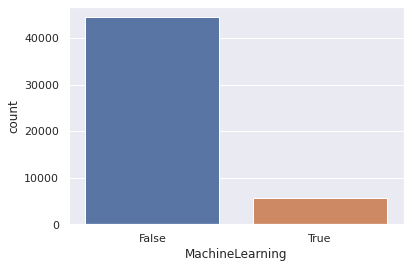

In [14]:
sns.countplot(x='MachineLearning', data=df, )
print(f"{df['MachineLearning'].mean() * 100}% labeled True")

To quickly get a feel for the distribution of data, we can use [`pandas-profiling`](https://github.com/pandas-profiling/pandas-profiling).

Note that the output is long and scrollable, so be sure to scroll through.

Some quick observations from this report are:
* We should drop the `FavoriteCount` column, since it's highly correlated with `Score`
* `Score, ViewCount, AnswerCount` are highly skewed, so we might take that into account in data preparation.
* Our label `MachineLearning` is not too strongly related with any other single feature
* The `CreationDate` field is negatively correlated with most numeric fields, which would make sense as newer questions haven't had as much time to gather views, upvotes and answers.
* `Body_Len` is negatively correlated with `AnswerCount`, which also makes sense - people are probably less inclined to read through a long question before answering it

There are probably many other things to learn from this report, but we'll leave it for now. [In the next part of the tutorial](https://dagshub.com/docs/tutorial/1-experiments), we'll use what we've learned about the data to process it for training models.

In [15]:
from pandas_profiling import ProfileReport
ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [16]:
# Drop the correlated features
df = df.drop(columns=['FavoriteCount'])

## Processing the data

First things first - we should split the data into train and test sets.

Even before training the model itself, the preprocessing stages are supposed to fit only the training data, not the test data.

In [17]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df)

Here, we try to scale and transform the numeric features to make them smoother, less skewed, and more appropriate for modeling.

`PowerTransformer` attempts to make the data more like a normal distribution, which should soften the impact of extreme outliers and make the distributions smoother.

`MinMaxScaler` is used as a first step to make sure the numbers are in a reasonable range, as `PowerTransformer` can fail on very large numbers.

In [18]:
from sklearn.preprocessing import MinMaxScaler, PowerTransformer
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(MinMaxScaler(), PowerTransformer())

numeric_col_names = ['Title_Len','Body_Len','CreationDate_Epoch','AnswerCount','ViewCount','Score','CommentCount']

train_df_norm = pd.DataFrame(pipeline.fit_transform(train_df[numeric_col_names]), columns=numeric_col_names)

train_df_norm = train_df_norm.combine_first(train_df.reset_index()) # Add the other columns back

In [19]:
test_df_norm = pd.DataFrame(pipeline.transform(test_df[numeric_col_names]), columns=numeric_col_names)
test_df_norm = test_df_norm.combine_first(test_df.reset_index()) # Add the other columns back

Looking at the new distribution of the features, we can see they're now scaled correctly and not as skewed.

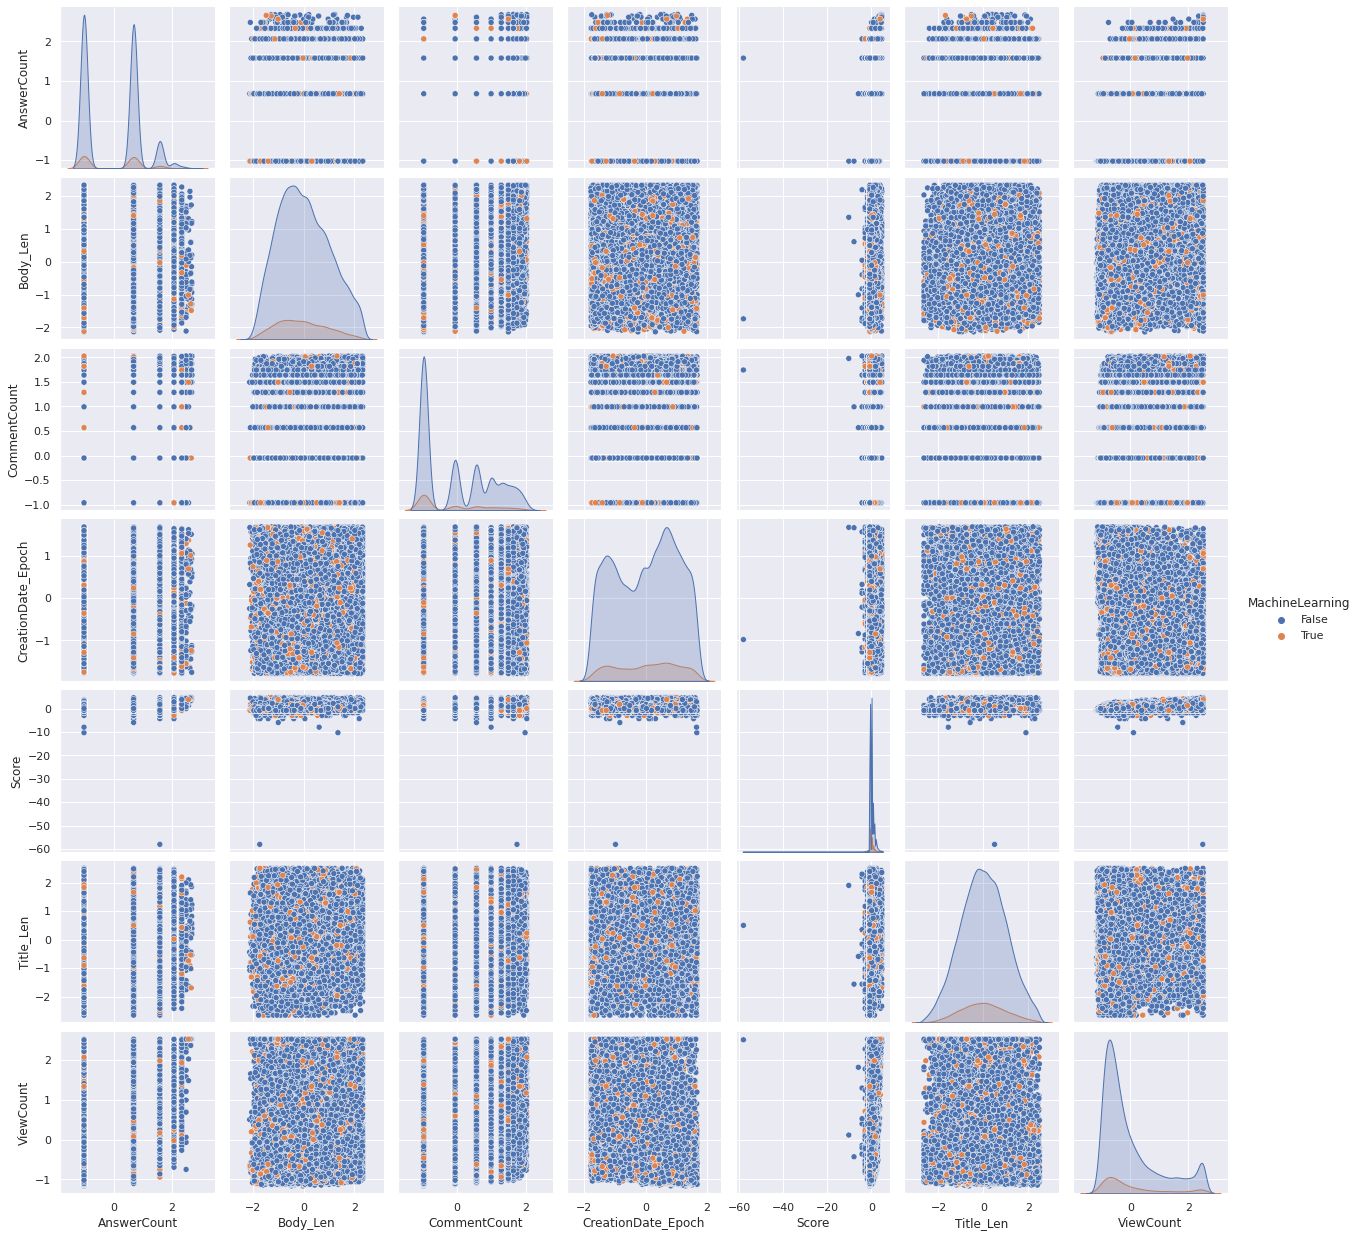

In [20]:
sns.pairplot(train_df_norm.drop(columns=['index','CreationDate']), hue='MachineLearning')

## Model training

Now, we'll fit a basic Logistic Regression model to our data, to see that it manages to learn anything. We're not trying to optimize it yet, just see that it successfully learns something useful, and that our preparation of the data helped.

For the time being, we'll only use the *numeric* columns for this model. The textual columns require specialized preprocessing before they can be used as input to a model.

We'll drop the `CreationDate` column, as its information is already stored in the scaled `CreationDate_Epoch` column.

To get a good idea of how well the model learned something useful about the data, we also reserve some of the data for testing.

In [21]:
import sklearn.linear_model
clf = sklearn.linear_model.LogisticRegression()
train_cols = [c for c in numeric_col_names if c != 'CreationDate']

X = train_df_norm[train_cols]
y = train_df_norm['MachineLearning']
clf.fit(X, y)

LogisticRegression()

## Evaluation

Since we know that the classes are very imbalanced (only about 8% of the questions labeled as `machine-learning`), we'll avoid using the accuracy metric as an indication. Instead, we'll take a look at the precision-recall curve and ROC, which can tell us more useful information.

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


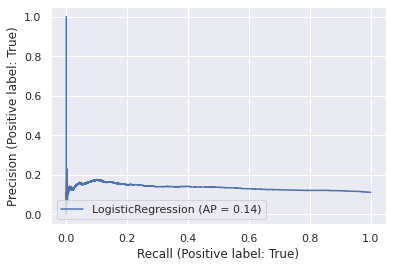

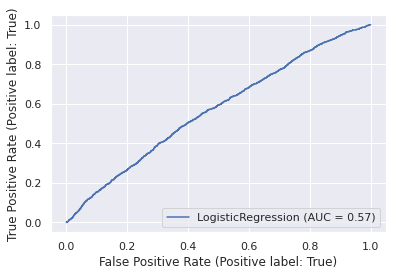

In [22]:
import sklearn.metrics
X_test = test_df_norm[train_cols]
y_test = test_df_norm['MachineLearning']
sklearn.metrics.plot_precision_recall_curve(clf, X_test, y_test)
sklearn.metrics.plot_roc_curve(clf, X_test, y_test)

We can also look at the learned feature importances to understand what our model is looking for:

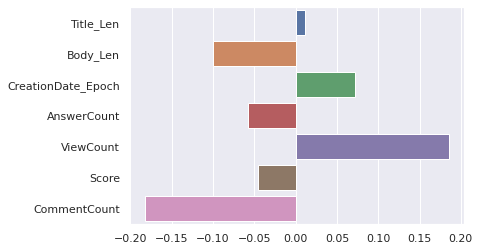

In [23]:
sns.barplot(y=train_cols, x=clf.coef_[0])

Looking at the following curves, we can see that the model really did learn useful information from the data, better than random at least. 

Let's compare to a classifier trained on the unscaled data:

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


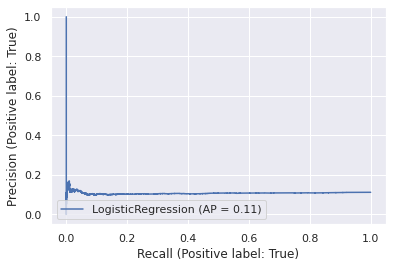

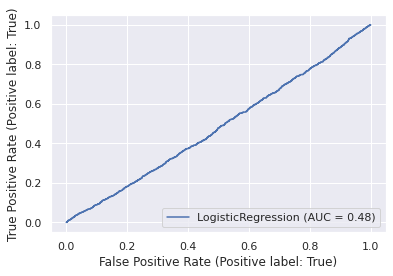

In [24]:
clf_raw = sklearn.linear_model.LogisticRegression()
X_raw = train_df[train_cols]
y_raw = train_df['MachineLearning']
clf_raw.fit(X_raw, y_raw)

X_test_raw = test_df[train_cols]
y_test_raw = test_df['MachineLearning']
sklearn.metrics.plot_precision_recall_curve(clf_raw, X_test_raw, y_test_raw)
sklearn.metrics.plot_roc_curve(clf_raw, X_test_raw, y_test_raw)

Clearly our data preprocessing helped - using the raw data yielded results that are even worse than random!

For sanity checking, let's compare it to a naive model, which always just guesses the common label:

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


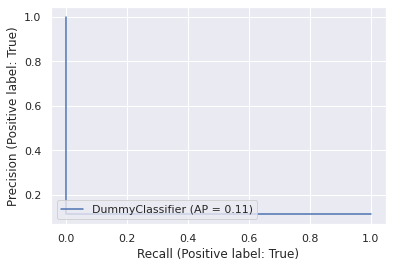

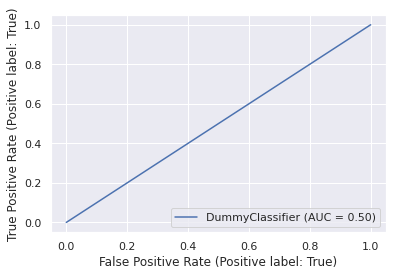

In [25]:
import sklearn.dummy
clf_dummy = sklearn.dummy.DummyClassifier()
clf_dummy.fit(X, y)

sklearn.metrics.plot_precision_recall_curve(clf_dummy, X_test, y_test)
sklearn.metrics.plot_roc_curve(clf_dummy, X_test, y_test)

## Textual Features

So, at this point we have a sense for our data, have found a good way to scale and normalze our *numeric* features, and have trained a very basic classifier on it.

The next phase would be to see what happens when we take advantage of our textual features - `Title` & `Body`. We'll use *only* the textual features to simplify things and isolate the effects.

To make things simple, we'll unify them into one big textual column.

In [26]:
train_text_col = train_df_norm['Title'].fillna('') + ' ' + train_df_norm['Body'].fillna('')
test_text_col = test_df_norm['Title'].fillna('') + ' ' + test_df_norm['Body'].fillna('')

To turn this text into numerical features that can be used as input to a ML model, we'll use [`TfidfVectorizer`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) with a sensible limit of vocabulary size (`max_features=25000`). It will split the text into tokens, and give each question in the data a numerical representation of the frequency of tokens in that question.

Note that special care is needed when handling [sparse matrices in Pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/sparse.html), and the result returned from `TfidfVectorizer` is a sparse matrix. **If you ignore this special handling, expect to run into out-of-memory errors, unresponsiveness and crashes as the sparse matrix gets inflated.**

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=25000)
tfidf.fit(train_text_col)
train_tfidf_df = pd.DataFrame.sparse.from_spmatrix(tfidf.transform(train_text_col), columns=tfidf.get_feature_names())
test_tfidf_df = pd.DataFrame.sparse.from_spmatrix(tfidf.transform(test_text_col), columns=tfidf.get_feature_names())

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


**Interesting notes:** Looks like many of the learned terms are: 
* Various numbers, like `00`, `00000000e` etc. It could be useful to prevent this splitting of numbers into many different terms in the vocabulary, since it probably won't matter to classifying the text.
* Multiple terms grouped together due to an underscore, like `variable_2`. This is probably an artifact of embedded Python or TeX code. It might help the model if we break these down to separate terms.
* Remember, the questions contain embedded HTML. While we're not seeing any terms that were clearly garbage created by HTML, it's a good bet that it will be useful to clean up the HTML tags in the text.

In [28]:
train_tfidf_df.sample(15, axis=1)

eq1  2786  2311  train_control  twang  1161  tumor  stores  light  \
0      0.0   0.0   0.0            0.0    0.0   0.0    0.0     0.0    0.0   
1      0.0   0.0   0.0            0.0    0.0   0.0    0.0     0.0    0.0   
2      0.0   0.0   0.0            0.0    0.0   0.0    0.0     0.0    0.0   
3      0.0   0.0   0.0            0.0    0.0   0.0    0.0     0.0    0.0   
4      0.0   0.0   0.0            0.0    0.0   0.0    0.0     0.0    0.0   
...    ...   ...   ...            ...    ...   ...    ...     ...    ...   
37495  0.0   0.0   0.0            0.0    0.0   0.0    0.0     0.0    0.0   
37496  0.0   0.0   0.0            0.0    0.0   0.0    0.0     0.0    0.0   
37497  0.0   0.0   0.0            0.0    0.0   0.0    0.0     0.0    0.0   
37498  0.0   0.0   0.0            0.0    0.0   0.0    0.0     0.0    0.0   
37499  0.0   0.0   0.0            0.0    0.0   0.0    0.0     0.0    0.0   

       compounds  factorize  071  theta_y  rfecontrol  choosen  
0            0.0        0.0  0.0      0.0         0.0      0.0  
1            0.0        0.0  0.0      0.0         0.0      0.0  
2            0.0        0.0  0.0      0.0         0.0      0.0  
3            0.0        0.0  0.0      0.0         0.0      0.0  
4            0.0        0.0  0.0      0.0         0.0      0.0  
...          ...        ...  ...      ...         ...      ...  
37495        0.0        0.0  0.0      0.0         0.0      0.0  
37496        0.0        0.0  0.0      0.0         0.0      0.0  
37497        0.0        0.0  0.0      0.0         0.0      0.0  
37498        0.0        0.0  0.0      0.0         0.0      0.0  
37499        0.0        0.0  0.0      0.0         0.0      0.0  

[37500 rows x 15 columns]

In [29]:
clf_tfidf = sklearn.linear_model.LogisticRegression()
clf_tfidf.fit(train_tfidf_df.sparse.to_coo(), y)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## Evaluating the textual model
Below, we can see that the new text-based model performs stunningly well!

This is not surprising, as most information will be contained in the text content of each question.

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


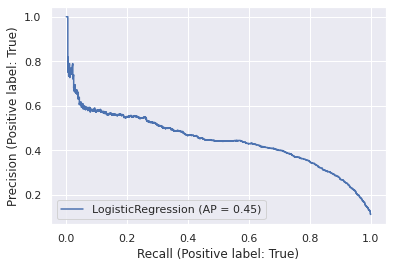

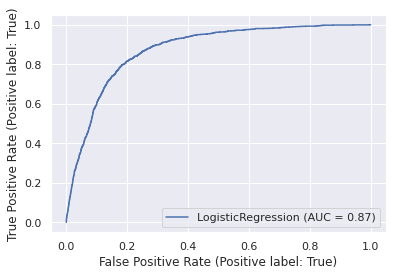

In [30]:
X_tfidf_test = test_tfidf_df.sparse.to_coo()
sklearn.metrics.plot_precision_recall_curve(clf_tfidf, X_tfidf_test, y_test)
sklearn.metrics.plot_roc_curve(clf_tfidf, X_tfidf_test, y_test)

As a sanity check, it's a good idea to check what terms the textual model cares about when making its decision.

As we see below, it looks like our model learned some very good, sensible terms, that we would have probably guessed on our own, such as `machine`, `learning`, `classifier`, etc.

It's interesting to note that `analysis` is a *negative*  predictor for a question about machine learning, as opposed to a general statistical question. Just throw a neural network at it 😅

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


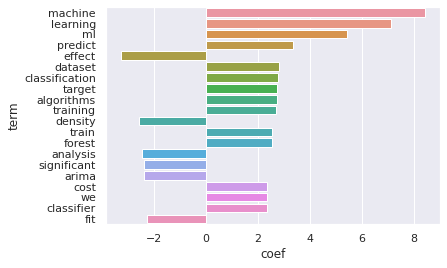

In [31]:
tfidf_coef_df = pd.DataFrame({'coef':clf_tfidf.coef_[0]})
tfidf_coef_df['term'] = tfidf.get_feature_names()
tfidf_coef_df['coef_abs'] = tfidf_coef_df['coef'].abs()
tfidf_coef_df = tfidf_coef_df.sort_values('coef_abs', ascending=False)
sns.barplot(y='term', x='coef', data=tfidf_coef_df[:20])

[![Stack More Layers](https://stackmorelayers.be/bg.png)](https://stackmorelayers.be)

# Conclusion

We got a good sense of our data, the type of preprocessing required, and managed to train some decent classifiers with it.

At this point in a Python data science project, it's common to take the conclusions and working code from the exploratory notebook, and turn them into normal Python modules. This enables us to more easily:
* Create reusable components that will be useful as the project matures.
* Use code versioning tools like Git.
* Make the process more reproducible by defining a clear pipeline (order of operations) for the data and model training.
* Automate running and tracking of experiments.
* Version our different experiments and models, so that we preserve knowledge and don't risk losing work by accident.

[In the next level of DAGsHub's tutorial](https://dagshub.com/docs/experiment-tutorial/1-setup/), we'll take what works from this notebook and turn it into a Python project, before [going forward with experimentation](https://dagshub.com/docs/experiment-tutorial/2-experiments/) to find the best performing model for out problem.

Made with 🐶 by [DAGsHub](https://dagshub.com).